In [6]:
import os
import glob

def list_exported_runs():
    """List all available exported runs in the exported_data directory."""
    export_dir = "exported_data"
    if not os.path.exists(export_dir):
        print("No exported data found.")
        return []

    csv_files = glob.glob(os.path.join(export_dir, "*.csv"))
    if not csv_files:
        print("No exported runs found.")
        return []

    csv_files.sort(key=os.path.getmtime, reverse=True)  # Sort by modification time, latest first
    print("Available exported runs:")
    for i, file in enumerate(csv_files):
        print(f"{i + 1}: {os.path.basename(file)}")
    return csv_files

def choose_run():
    """Let the user choose a run to import."""
    csv_files = list_exported_runs()
    if not csv_files:
        return None

    while True:
        try:
            choice = input("Enter the number of the run to import, 'latest' for the most recent run, or 'exit' to cancel: ").strip().lower()
            if choice == "exit":
                print("Operation cancelled.")
                return None
            elif choice == "latest":
                return csv_files[0]  # Return the latest run
            else:
                choice = int(choice) - 1
                if 0 <= choice < len(csv_files):
                    return csv_files[choice]
                else:
                    print("Invalid choice. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number, 'latest', or 'exit'.")

# Example usage
selected_run = choose_run()
if selected_run:
    print(f"You selected: {selected_run}")
else:
    print("No run selected.")

Available exported runs:
1: exported_data_20250429_211024.csv
2: exported_data_20250429_211020.csv
3: exported_data_20250429_210919.csv
4: exported_data_20250429_210415.csv
5: exported_data_20250429_210212.csv
6: exported_data_20250429_210210.csv
7: exported_data_20250429_210209.csv
8: exported_data_20250429_210052.csv
You selected: exported_data\exported_data_20250429_210209.csv


In [7]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv(selected_run)
data

,Timestamp,Signal 1,Signal 2,Referemce
0,0.0,0.0,0.0,1.0
1,0.1,145.0,53.0,1.0
2,0.2,151.0,53.0,1.0
3,0.3,144.0,53.0,1.0
4,0.4,147.0,53.0,1.0
...,...,...,...,...
321,32.1,72.0,57.0,1.0
322,32.2,58.0,57.0,1.0
323,32.3,57.0,57.0,1.0
324,32.4,61.0,56.0,1.0


In [8]:
data['Signal 2']

0       0.0
1      53.0
2      53.0
3      53.0
4      53.0
       ... 
321    57.0
322    57.0
323    57.0
324    56.0
325    56.0
Name: Signal 2, Length: 326, dtype: float64

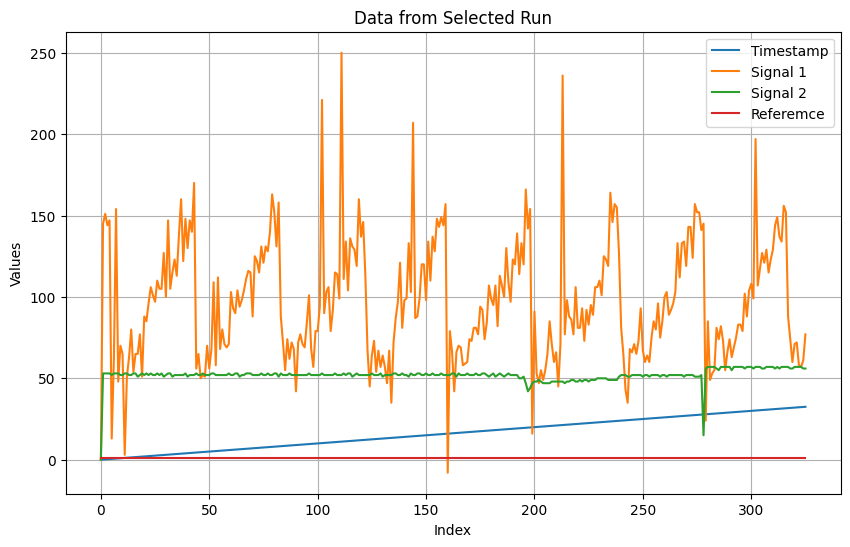

In [9]:
# Plot the data (assuming it has numerical columns to plot)
data.plot(kind='line', figsize=(10, 6))
plt.title("Data from Selected Run")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
# amplitude = (x_2 - x_1) / (y_2 - y_1) -> y = output, x = input
# bias = x_1 - amplitude * y_1

# amplitude adjustment: a_new = (x_1 - b_old)/y_1
# bias adjustment: b_new = x_1 - a_old * y_1